# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def dice():
    return list(random.choices([1,2,3,4,5,6], k=10))


In [3]:
dice = dice()

#### 2.- Plot the results sorted by value.

In [4]:
#sorting list
dice_sorted = sorted(dice)

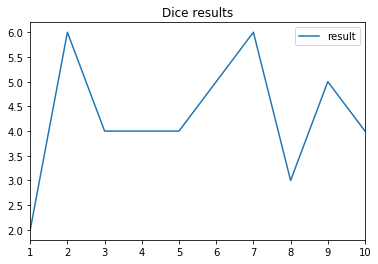

In [5]:
#sorting list
dice_sorted = sorted(dice)

#converting to dataframe to use plot
dice_df = pd.DataFrame(dice, columns = ["result"])

#changin zero indexing to make the graph more readable
dice_df.index = np.arange(1,len(dice_df)+1)

dice_df.plot(title = "Dice results")


plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

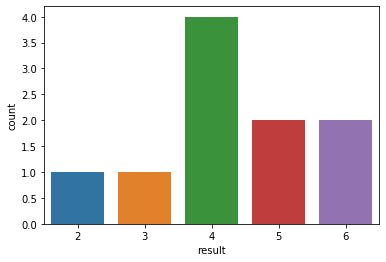

In [6]:
ax = sns.countplot(x="result",data=dice_df)

In [7]:
"""
In the second graph we can see how many times each result occured (frequency)
while in the first graph we can only see what the result was for each dice roll.
"""

'\nIn the second graph we can see how many times each result occured (frequency)\nwhile in the first graph we can only see what the result was for each dice roll.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
def manual_mean(x):
    return sum(x)/len(x)

In [9]:
#testing out
manual_mean([2,2])

2.0

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
def freq_mean(x):
    frequency_distribution = dict((i, x.count(i)) for i in x)
    avg = sum(frequency_distribution.values())/len(frequency_distribution)
    return avg


In [11]:
#testing out
freq_mean([2,3,4,4,4])

1.6666666666666667

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [14]:
def median(lst):
    """function to sort list and then calculate median using the index"""
    sorted_lst = sorted(lst)
    lst_len = len(lst)
    index = (lst_len - 1) // 2

    if (lst_len % 2):
        return sorted_lst[index]
    else:
        return (sorted_lst[index] + sorted_lst[index + 1])/2.0

In [15]:
# testing out
median([1,2,4,3,3])

3

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [ ]:
# your code here

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

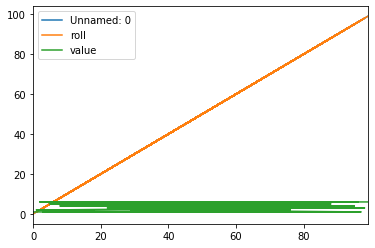

In [16]:
# preparing dataframe
data_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv')
data_hundred = data_hundred.sort_values(by="value")
data_hundred.plot()
plt.show()


In [ ]:
data_hundred.head()

In [ ]:
"""
Because all values are between 1 and 6 and the dice was rolled a 100 times, this plot
is not very useful. It would be best to calculate the frequency of each result and then
visualise it.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [17]:
data_hundred.apply(manual_mean)

Unnamed: 0    49.50
roll          49.50
value          3.74
dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [20]:
data_hundred["value"].value_counts().sort_index()

1    12
2    17
3    14
4    22
5    12
6    23
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

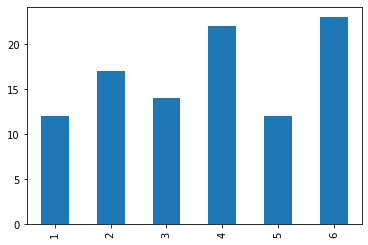

In [21]:
#changed to plot bar because .hist didn't give me easy-to-read distribution
data_hundred["value"].value_counts().sort_index().plot.bar()
plt.show()

In [ ]:
"""
The plot is slightly right skewed, which has affected the mean to almost 4 (3.74),
which is above 3 (the "expected" mean)
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

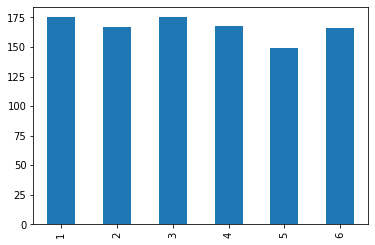

In [22]:
data_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')
data_thousand["value"].value_counts().sort_index().plot.bar()
plt.show()

In [ ]:
"""
Distribution is much equal, because there were more datapoints (1000 vs 100)

"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

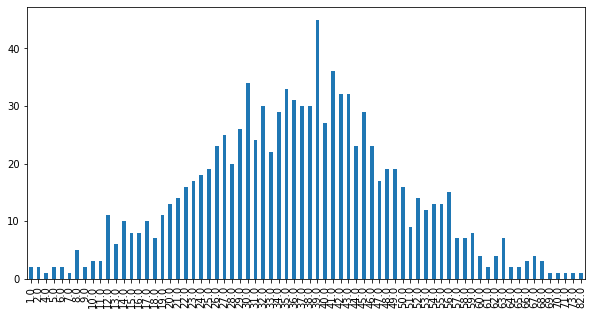

In [23]:
ages_pop = pd.read_csv('../data/ages_population.csv')
ages_pop["observation"].value_counts().sort_index().plot.bar(figsize=(10,5))

plt.show()


#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [24]:
print("Mean is - ", ages_pop["observation"].mean(),
     "Standard deviation is ", ages_pop["observation"].std())

Mean is -  36.56 Standard deviation is  12.81649962597677


In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

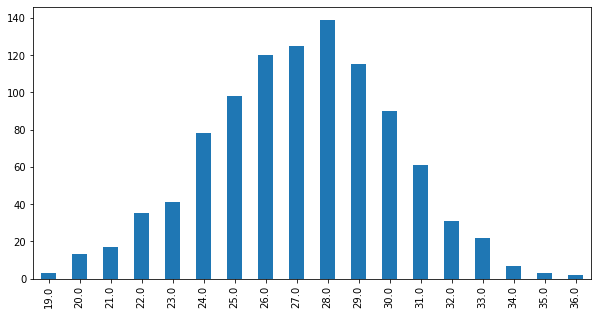

In [25]:
ages_pop2 = pd.read_csv('../data/ages_population2.csv')
ages_pop2["observation"].value_counts().sort_index().plot.bar(figsize=(10,5))

plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Yes, distribution is still "normal", but the range is much shorter
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [26]:
print("Mean is ", ages_pop2["observation"].mean(), "and",
     "Standard deviation is ", ages_pop2["observation"].std())

Mean is  27.155 and Standard deviation is  2.9698139326891835


In [ ]:
"""
With range being much shoter, variance is smaller as well as the stantard variation
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

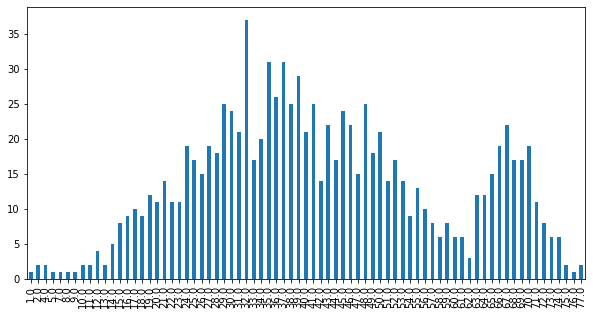

In [27]:
ages_pop3 = pd.read_csv('../data/ages_population3.csv')
ages_pop3["observation"].value_counts().sort_index().plot.bar(figsize=(10,5))

plt.show()


#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [28]:
print("Mean is ", ages_pop3["observation"].mean(), "and",
     "Standard deviation is ", ages_pop3["observation"].std())

Mean is  41.989 and Standard deviation is  16.14470595986593


In [ ]:
"""
This is not a normal distribution anymore because we can see a high number of people over 60 years old. 
This has affected the mean and the standard deviation which are now higher. 
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""